In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import textwrap

mpl.style.use('toby')

## Import data

In [59]:
group_df = pd.read_csv('../data/all_data_long.csv')
group_df_wide = pd.read_csv('../data/all_data_wide.csv')

## Work out frequencies etc

In [60]:
# This category has different labels - make them the same
group_df_wide.loc[group_df_wide['Employment Status'].str.contains('homemaker') == True, 'Employment Status'] = 'Not in paid work (e.g. homemaker, retired or disabled)'

# Gender
sex, sex_counts = np.unique(group_df_wide['Sex'].astype(str), return_counts=True)
sex[-1] = 'Other / no data'

# Employment 
employment, employment_counts = np.unique(group_df_wide['Employment Status'].astype(str), return_counts=True)
employment[-1] = 'Other / no data'
employment = employment[::-1]
employment_counts = employment_counts[::-1]
employment = np.roll(employment, -1)
employment_counts = np.roll(employment_counts, -1)

# Student status
student, student_counts = np.unique(group_df_wide['Student Status'].astype(str), return_counts=True)
student[-1] = 'Other / no data'

# Get totals for normalising
total_sex = np.sum(sex_counts)
total_student = np.sum(student_counts)
total_employment = np.sum(employment_counts)

## Make a figure

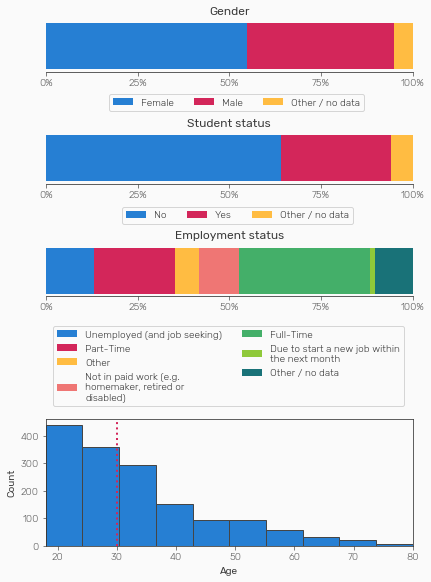

In [74]:
f, ax = plt.subplots(5, 1, figsize=(6, 9), gridspec_kw={'height_ratios': [0.2, 0.2, 0.2, 0.001, 0.5]})

colours = ['#' + i for i in '267fd3-d3265a-ffbc42-EF7674-44af69'.split('-')] + ['#8FC93A'] + ['#197278']

# SEX
current_left = 0
for n, i in enumerate(sex):
    ax[0].barh([0], sex_counts[n] / total_sex, label=i, left=current_left, color=colours[n])
    current_left += sex_counts[n] / total_sex

ax[0].set_yticks([])
ax[0].set_xticks([0, 0.25, 0.5, 0.75, 1])
ax[0].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
ax[0].set_xlim(0, 1)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].legend(bbox_to_anchor=(0.88, -0.35), ncol=3)
ax[0].set_title("Gender")

# STUDENT
current_left = 0
for n, i in enumerate(student):
    ax[1].barh([0], student_counts[n] / total_student, label=i, left=current_left, color=colours[n])
    current_left += student_counts[n] / total_student

ax[1].set_yticks([])
ax[1].set_xticks([0, 0.25, 0.5, 0.75, 1])
ax[1].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
ax[1].set_xlim(0, 1)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].legend(bbox_to_anchor=(0.85, -0.35), ncol=3)
ax[1].set_title("Student status")

# EMPLOYMENT
current_left = 0
for n, i in enumerate(employment):
    ax[2].barh([0], employment_counts[n] / total_employment, label='\n'.join(textwrap.wrap(i, 30, break_long_words=False)), left=current_left, color=colours[n])
    current_left += employment_counts[n] / total_employment

ax[2].set_yticks([])
ax[2].set_xticks([0, 0.25, 0.5, 0.75, 1])
ax[2].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
ax[2].set_xlim(0, 1)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].legend(bbox_to_anchor=(.99, -.5), ncol=2)
ax[2].set_title("Employment status")

ax[3].axis('off')

# Age
ax[4].hist(group_df_wide['age'], color='#267fd3', linewidth=1, edgecolor='#454545')
ax[4].axvline(group_df_wide['age'].median(), linestyle=':', linewidth=2, color=colours[1])
ax[4].set_xlim(18, 80)
ax[4].set_xlabel("Age")
ax[4].set_ylabel("Count")

f.subplots_adjust(hspace=1.1, left=0.1)

plt.savefig('../figures/demographics.svg')
plt.savefig('../figures/demographics.png', dpi=200)

In [70]:
group_df_wide['age'].median()

30.0